Make_blobs()   cluster_std  0.7 / 3개의 군집데이터 / bandwidth 0.8 설정  의
### 평균이동 군집화 예제

In [22]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.7, random_state=0)



In [18]:
X

array([[-1.67173659,  3.5340075 ],
       [ 0.73273157,  4.41323161],
       [ 1.08473328,  4.56850109],
       [-1.45849654,  3.32594984],
       [ 1.1850368 ,  5.23225746],
       [-0.98562693,  2.08916581],
       [ 2.42001293,  0.49461208],
       [ 1.70664481,  2.2483361 ],
       [ 1.06510854,  4.58517988],
       [-1.66036146,  2.6414876 ],
       [ 0.69404622,  5.15949888],
       [-1.04126281,  2.80618085],
       [ 1.50899649,  4.38895984],
       [ 1.25347478,  3.53864427],
       [ 0.34116122,  4.3401491 ],
       [-1.12980082,  2.76200969],
       [ 2.60569709,  0.57117029],
       [ 2.15463474,  0.67413377],
       [ 0.40706768,  3.09538951],
       [-2.94838314,  4.36302726],
       [-1.12193896,  3.16264038],
       [ 1.53393915,  0.31915668],
       [ 1.00830104,  4.17275863],
       [ 1.63934646,  4.19528026],
       [-3.10579897,  2.20212747],
       [-0.15345841,  4.15486913],
       [ 1.60473464, -0.65871855],
       [-2.06180476,  1.91142823],
       [-0.92635727,

In [20]:
y

array([2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1,
       0, 0, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2,
       0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1,
       0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 1,
       1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 1, 2, 2, 2,
       0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2,
       0, 2, 0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 1, 1, 1, 2, 1,
       0, 1])

In [24]:
meanshift= MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


* 지나친 세분화 ( 위 ) 총 6개

* bandwidth 올리기 (아래)

In [29]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


* 3개의 군집 ( 위 )
* badwidth 최적화 찾기 ( 아래 )

In [33]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.816


* badwidth 최적화 적용 하여 평균 이동 하기

* 결과는 군집 3개

In [36]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


3개의 군집 시각화

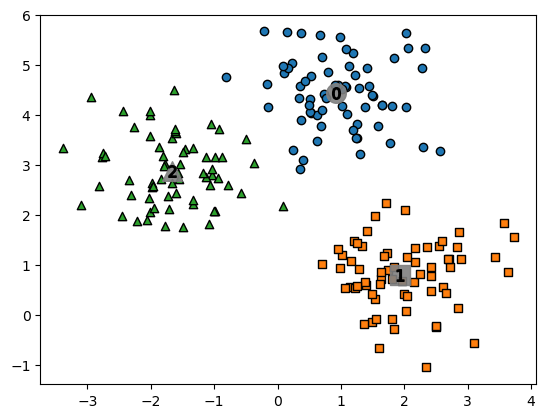

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label] )
    
    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

target 과 군집 label 값 비교

In [57]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


깔끔하네?